In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
from matplotlib.ticker import MaxNLocator


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
# this functions fits a sine to the discharge data and extacts the response around the drive frequency

ll = likelihood_analyser.LikelihoodAnalyser()
def get_scale(i,phase="sin",fsamp=5000,drive_freq=71,decimate=10,bandwidth=2):
    calibrationFile = step_cal_files[i]       
    calibFreqs = np.fft.rfftfreq(len(calibrationFile.electrode_data[0]), d=1./5000)
    fft_angles = np.angle(np.fft.rfft(calibrationFile.electrode_data[0]))
    if(phase=="cos"):
        phaseResponse = (fft_angles[calibFreqs==drive_freq])%(2*np.pi)
    elif(phase=="sin"):
        phaseResponse = (fft_angles[calibFreqs==drive_freq]+np.pi/2)%(2*np.pi)

    print(phaseResponse,np.std(calibrationFile.electrode_data[0])*np.sqrt(2),np.std(calibrationFile.electrode_data[1])*np.sqrt(2))

    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': phaseResponse, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}

    frequency = fit_kwargs['f']

    b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/fsamp, 2.*(drive_freq+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, calibrationFile.x2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [3]:
step_cal_dir = r'/data/new_trap/20210622/bead1/Discharge/FineDischarge/'
step_cal_files = load_dir(step_cal_dir, start_file=300)

100%|██████████| 280/280 [00:07<00:00, 37.82it/s]

580  files in folder
280  files loaded


In [4]:
dischargeAmps = []
for i in range(len(step_cal_files)):
    print(i,'/',len(step_cal_files))
    dischargeAmps.append(get_scale(i))

0 / 280
[0.08190331] 9.996283880412916 9.99631373324689
1 / 280
[0.08190909] 9.996281304225382 9.996315292450861
2 / 280
[0.08189878] 9.996281537733502 9.99631617461155
3 / 280
[0.08188683] 9.996288002004473 9.996314326254831
4 / 280
[0.08188301] 9.996283855239406 9.996317000239625
5 / 280
[0.0818812] 9.996280896041402 9.99631301273478
6 / 280
[0.08188132] 9.996280781109695 9.996312890518594
7 / 280
[0.08187602] 9.996281466488083 9.99631518345931
8 / 280
[0.08187166] 9.996283836062767 9.996313253185603
9 / 280
[0.08186824] 9.99628049649982 9.996313334107894
10 / 280
[0.08185259] 9.99628122742368 9.99631373649319
11 / 280
[0.08184229] 9.996278292760515 9.996317929139986
12 / 280
[0.08184375] 9.9962872679154 9.996318088026388
13 / 280
[0.08185011] 9.996282311106809 9.99631429297684
14 / 280
[0.08185688] 9.996282232848417 9.99631907865186
15 / 280
[0.08187448] 9.99628608262862 9.996318417162112
16 / 280
[0.0818733] 9.996285608676523 9.996313350187156
17 / 280
[0.08187297] 9.99628486550703

155 / 280
[0.08186745] 9.99628051493799 9.99631490520472
156 / 280
[0.08186083] 9.996283894517536 9.996314274218701
157 / 280
[0.0818686] 9.996281967184345 9.996313058562459
158 / 280
[0.08185006] 9.996283967702656 9.996315269467841
159 / 280
[0.08186204] 9.996279126556052 9.996313567016497
160 / 280
[0.08184428] 9.996279163145 9.996320413948037
161 / 280
[0.08183594] 9.996281178656973 9.996325007542637
162 / 280
[0.08183232] 9.996277509907786 9.99632154417748
163 / 280
[0.0818416] 9.996280080618448 9.99632063393563
164 / 280
[0.08183505] 9.996282275406115 9.99632093297019
165 / 280
[0.08182993] 9.99627944335011 9.996317993996266
166 / 280
[0.08184753] 9.996281867418553 9.99631641962061
167 / 280
[0.08184877] 9.996280614515376 9.99631890303601
168 / 280
[0.08185021] 9.996281634592233 9.996315079069742
169 / 280
[0.08184074] 9.996279459159103 9.996315599717043
170 / 280
[0.08184065] 9.996284246273515 9.99631916974829
171 / 280
[0.08183942] 9.996279115761428 9.996317509888911
172 / 280
[

In [8]:



# extract the applied voltage the

dischargeVoltage = np.std(step_cal_files[-1].electrode_data[0])*np.sqrt(2)+np.std(step_cal_files[-1].electrode_data[1])*np.sqrt(2) 

# select (manually) the charge and the respective files
charge=1 
scaleX = np.abs(np.mean(dischargeAmps[180:200]))/charge # scales bits to charges
scaleY = scaleX*-1.0502 # from discharge values in x and y

eta=0.6 # get from COMSOL 
scaleForceX= np.abs(np.mean(dischargeAmps[180:200]))/(dischargeVoltage*1.602e-19*eta)*8e-3 #scales bits to Newton : Is there a time missing?

#scaleY = scaleX*-1.0502 # from discharge values in x and y
#print("Scale is ", scaleY)
print("Scale is ", scaleY)
print("voltage: ", dischargeVoltage)
print(scaleX)

Scale is  -3.542952205750171e-05
voltage:  19.992594782068107
3.373597605932366e-05


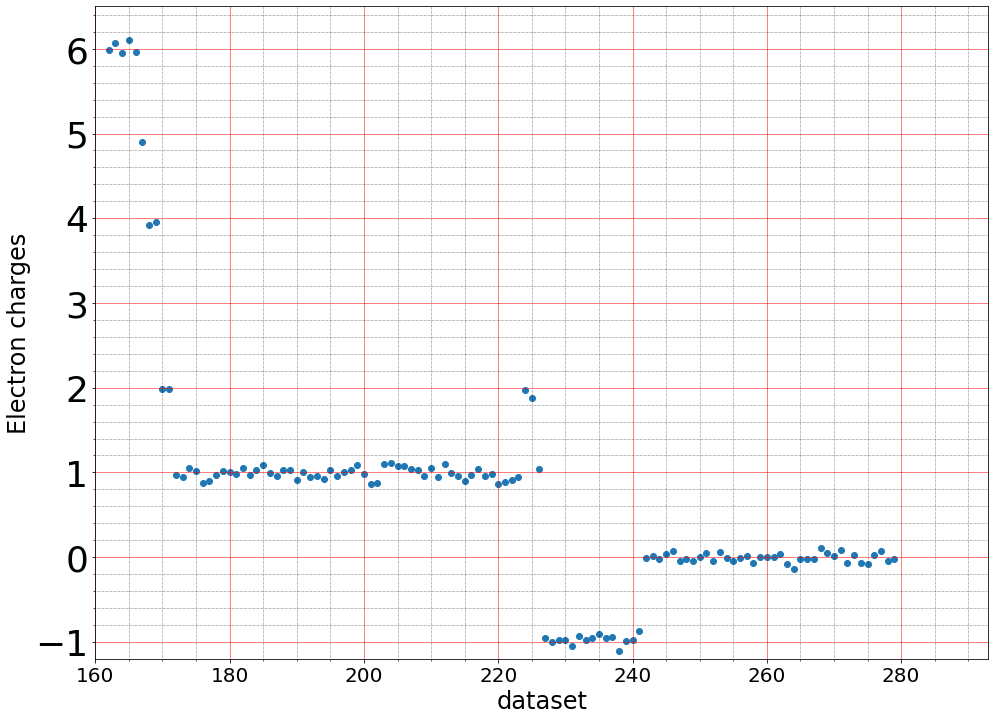

In [9]:
# amps = np.array(amps)
dischargeAmpArr = np.array(dischargeAmps)
_,ax = plt.subplots(figsize=(16,12))
# scale = 326.26

# Perrinf
ax.scatter(range(len(dischargeAmpArr)), dischargeAmpArr/scaleX, label='fit phase')
# ax.scatter(range(len(amps3)), amps3/scale, label='fit fixed-phases')

ax.set(xlabel='dataset', ylabel='Electron charges', ylim=(-1.2,6.5), xlim=(160,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# ax.legend()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [36]:
# no gap measurements
folders = [r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/',
           r"/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/40V_norelax/",
           r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/',
           r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/',]
           
df0_0,v0_0 = compare_millicharge_full_analysis_perFile(folders[0],fileNo=5000,gap=1,ElectrodeRatio=0.85,axis="y",scaleFactor=scaleY,)



100%|██████████| 5000/5000 [00:35<00:00, 139.67it/s]


In [37]:
print(np.mean(v0_0[0]),np.mean(v0_0[1]))

10.28925849873122 10.172744658109677


F1     -5.838966e-03
F2      5.892907e-03
F3      5.892907e-03
G1     -4.045831e-03
G2      4.868202e-03
G3      4.868202e-03
A      -8.299951e-04
A/Um   -3.396997e-07
B       4.230112e-03
dtype: float64
F1      1.648875e-03
F2      1.653282e-03
F3      1.653282e-03
G1      1.623688e-03
G2      1.586059e-03
G3      1.586059e-03
A       2.134047e-03
A/Um    8.734209e-07
B       3.182535e-03
dtype: float64
F1     -3.541182
F2      3.564370
F3      3.564370
G1     -2.491754
G2      3.069369
G3      3.069369
A      -0.388930
A/Um   -0.388930
B       1.329164
dtype: float64


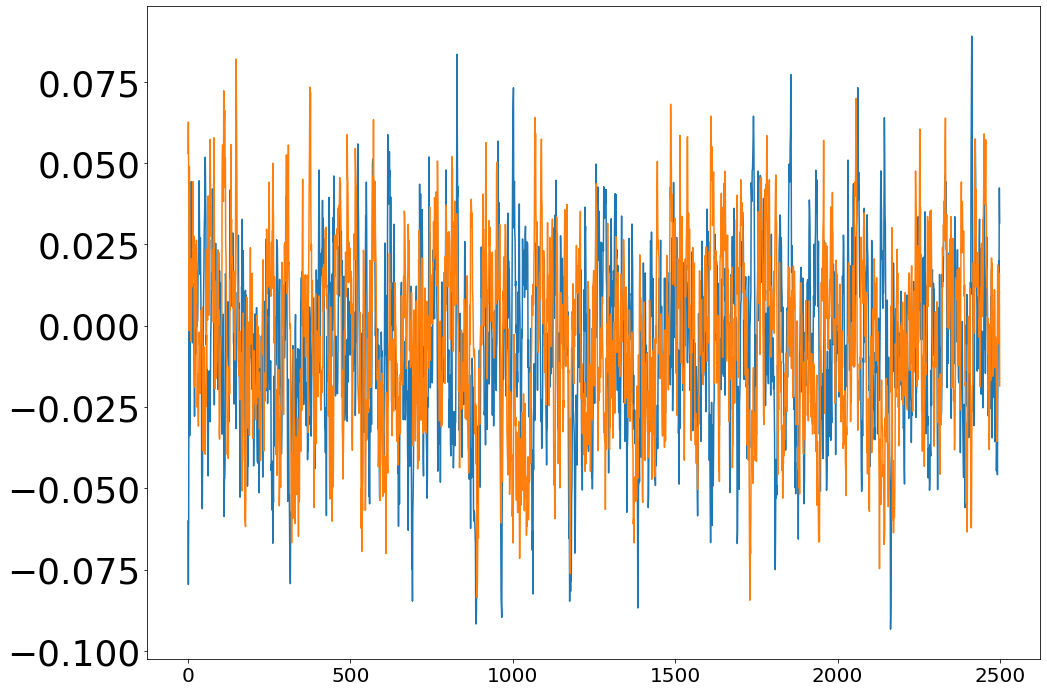

(F1     -5.838966e-03
 F2      5.892907e-03
 F3      5.892907e-03
 G1     -4.045831e-03
 G2      4.868202e-03
 G3      4.868202e-03
 A      -8.299951e-04
 A/Um   -3.396997e-07
 B       4.230112e-03
 dtype: float64,
 F1      1.648875e-03
 F2      1.653282e-03
 F3      1.653282e-03
 G1      1.623688e-03
 G2      1.586059e-03
 G3      1.586059e-03
 A       2.134047e-03
 A/Um    8.734209e-07
 B       3.182535e-03
 dtype: float64)

In [38]:
quickAnalyzeDataFrame(df0_0)

In [39]:
df0_1,v0_1 = compare_millicharge_full_analysis_perFile(folders[1],fileNo=1998,gap=1,ElectrodeRatio=0.85,axis="y",scaleFactor=scaleY,)


100%|██████████| 1998/1998 [00:17<00:00, 113.42it/s]


In [45]:
print(np.mean(v0_1[0]),np.mean(v0_1[1]))

20.278618367082064 0.09456465819300527


F1     -0.005853
F2     -0.077804
F3     -0.077804
G1     -0.007309
G2      0.009858
G3      0.009858
A      -0.071987
A/Um   -0.000029
B       0.009450
dtype: float64
F1      0.001424
F2      0.126820
F3      0.126820
G1      0.001397
G2      0.118840
G3      0.118840
A       0.107817
A/Um    0.000043
B       0.202099
dtype: float64
F1     -4.109975
F2     -0.613502
F3     -0.613502
G1     -5.233342
G2      0.082951
G3      0.082951
A      -0.667674
A/Um   -0.667674
B       0.046758
dtype: float64


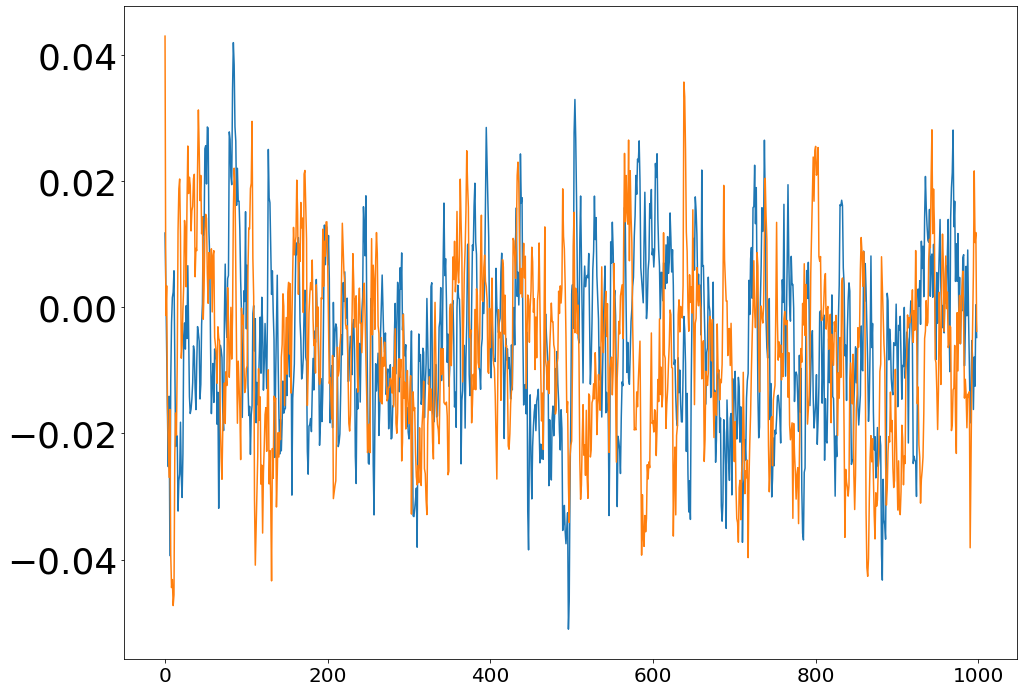

(F1     -0.005853
 F2     -0.077804
 F3     -0.077804
 G1     -0.007309
 G2      0.009858
 G3      0.009858
 A      -0.071987
 A/Um   -0.000029
 B       0.009450
 dtype: float64,
 F1      0.001424
 F2      0.126820
 F3      0.126820
 G1      0.001397
 G2      0.118840
 G3      0.118840
 A       0.107817
 A/Um    0.000043
 B       0.202099
 dtype: float64)

In [43]:
quickAnalyzeDataFrame(df0_1)

In [49]:
df0_2,v0_2 = compare_millicharge_full_analysis_perFile(folders[2],fileNo=5000,gap=1,ElectrodeRatio=0.85,axis="y",scaleFactor=scaleY,)


100%|██████████| 5000/5000 [00:46<00:00, 107.35it/s]


In [52]:
print(np.mean(v0_2[0]),np.mean(v0_2[1]))

75.31588740361612 74.88207580393171


F1     -4.565747e-03
F2      6.822424e-03
F3      6.822424e-03
G1     -2.785816e-02
G2      5.240000e-02
G3      5.240000e-02
A       1.233313e-03
A/Um    6.610666e-08
B       6.122183e-02
dtype: float64
F1      2.503526e-04
F2      2.793094e-04
F3      2.793094e-04
G1      2.006151e-04
G2      2.044145e-04
G3      2.044145e-04
A       2.925459e-04
A/Um    1.568072e-08
B       4.023157e-04
dtype: float64
F1      -18.237271
F2       24.426049
F3       24.426049
G1     -138.863718
G2      256.341869
G3      256.341869
A         4.215794
A/Um      4.215794
B       152.173603
dtype: float64


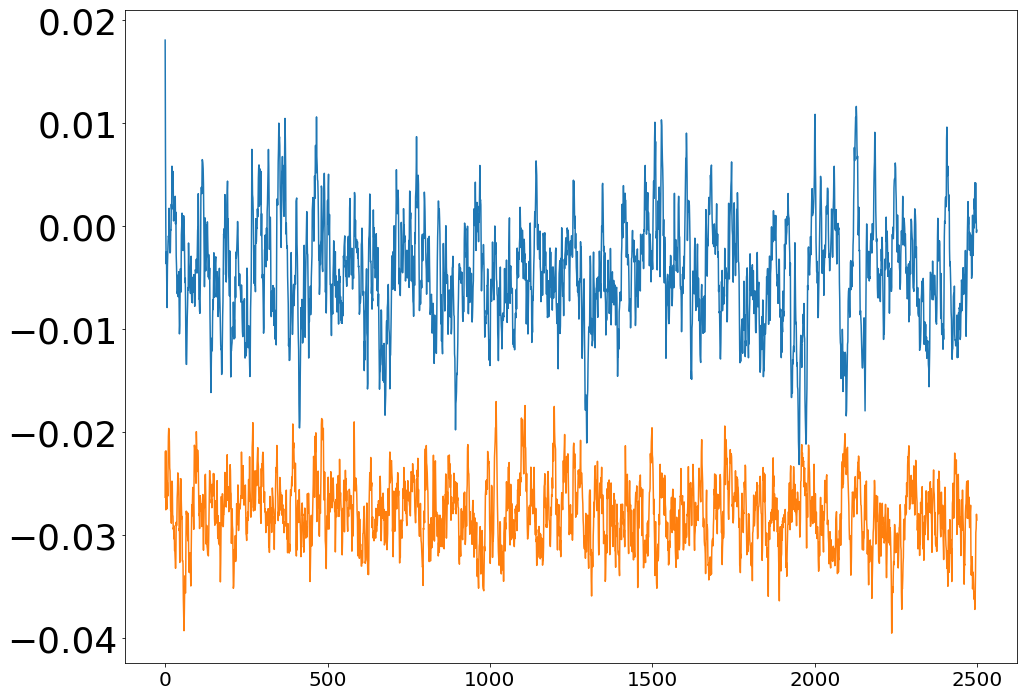

(F1     -4.565747e-03
 F2      6.822424e-03
 F3      6.822424e-03
 G1     -2.785816e-02
 G2      5.240000e-02
 G3      5.240000e-02
 A       1.233313e-03
 A/Um    6.610666e-08
 B       6.122183e-02
 dtype: float64,
 F1      2.503526e-04
 F2      2.793094e-04
 F3      2.793094e-04
 G1      2.006151e-04
 G2      2.044145e-04
 G3      2.044145e-04
 A       2.925459e-04
 A/Um    1.568072e-08
 B       4.023157e-04
 dtype: float64)

In [53]:
quickAnalyzeDataFrame(df0_2)

In [54]:
df0_3,v0_3 = compare_millicharge_full_analysis_perFile(folders[3],fileNo=1998,gap=1,ElectrodeRatio=0.85,axis="y",scaleFactor=scaleY,)


100%|██████████| 1998/1998 [00:23<00:00, 84.22it/s] 


In [55]:
print(np.mean(v0_3[0]),np.mean(v0_3[1]))

100.48065316400725 0.11052813677091688


F1     -0.003764
F2     -0.034881
F3     -0.034881
G1     -0.037098
G2      0.034379
G3      0.034379
A      -0.033413
A/Um   -0.000003
B       0.021347
dtype: float64
F1      0.000327
F2      0.059561
F3      0.059561
G1      0.000249
G2      0.060273
G3      0.060273
A       0.050620
A/Um    0.000004
B       0.102454
dtype: float64
F1      -11.504399
F2       -0.585647
F3       -0.585647
G1     -149.105202
G2        0.570396
G3        0.570396
A        -0.660075
A/Um     -0.660075
B         0.208359
dtype: float64


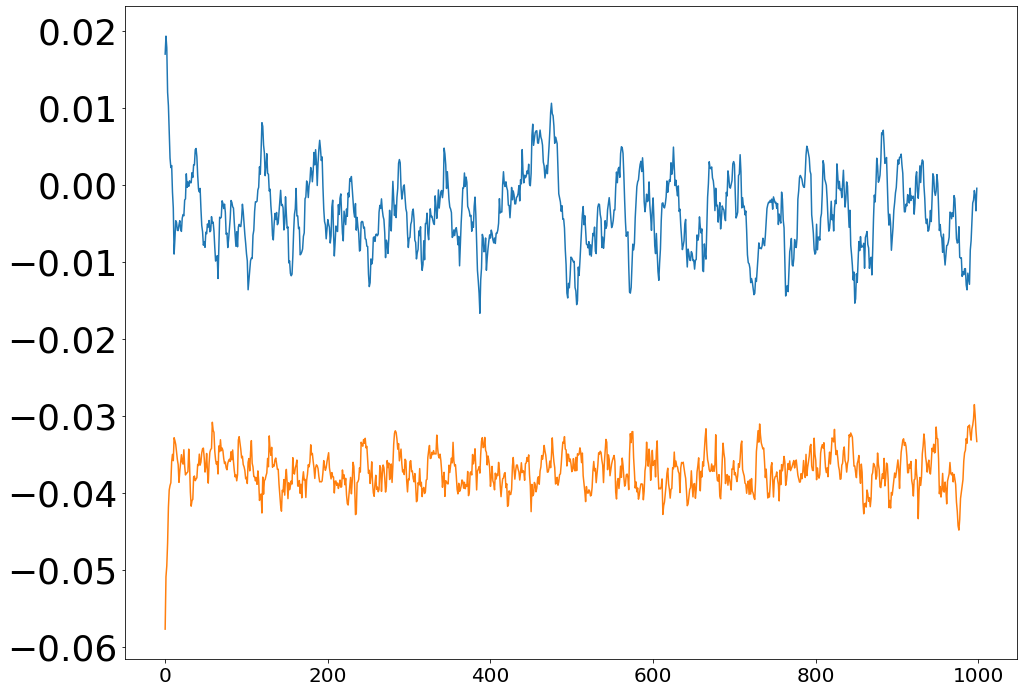

(F1     -0.003764
 F2     -0.034881
 F3     -0.034881
 G1     -0.037098
 G2      0.034379
 G3      0.034379
 A      -0.033413
 A/Um   -0.000003
 B       0.021347
 dtype: float64,
 F1      0.000327
 F2      0.059561
 F3      0.059561
 G1      0.000249
 G2      0.060273
 G3      0.060273
 A       0.050620
 A/Um    0.000004
 B       0.102454
 dtype: float64)

In [56]:
quickAnalyzeDataFrame(df0_3)

In [59]:
#gap measurements
folders = [r'/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V/']
df1,v1 = compare_millicharge_full_analysis_perFile(folders[0],fileNo=750,gap=5,axis="y",scaleFactor=scaleY)
#df1_side = get_sideband_analysis_perFile(folders,fileNo=750,gap=5)


100%|██████████| 750/750 [00:08<00:00, 93.72it/s] 


In [85]:
#gap measurements
folders = [r"/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V_2/",]
df2,v2 = compare_millicharge_full_analysis_perFile(folders[0],fileNo=18000,gap=2,axis="y",scaleFactor=scaleY)


100%|██████████| 18000/18000 [01:06<00:00, 269.63it/s]


F1     -1.268911e-04
F2      1.048972e-04
F3      2.812805e+02
G1     -1.623630e-04
G2     -1.597481e-04
G3      8.616865e+00
A      -3.772852e-05
A/Um   -3.019644e-09
B      -4.339347e-04
dtype: float64
F1      1.383536e-04
F2      1.383549e-04
F3      1.827042e+02
G1      1.333186e-04
G2      1.423419e-04
G3      1.173873e+02
A       1.828014e-04
A/Um    1.463072e-08
B       2.738471e-04
dtype: float64
F1     -0.917151
F2      0.758174
F3      1.539541
G1     -1.217857
G2     -1.122285
G3      0.073405
A      -0.206391
A/Um   -0.206391
B      -1.584588
dtype: float64


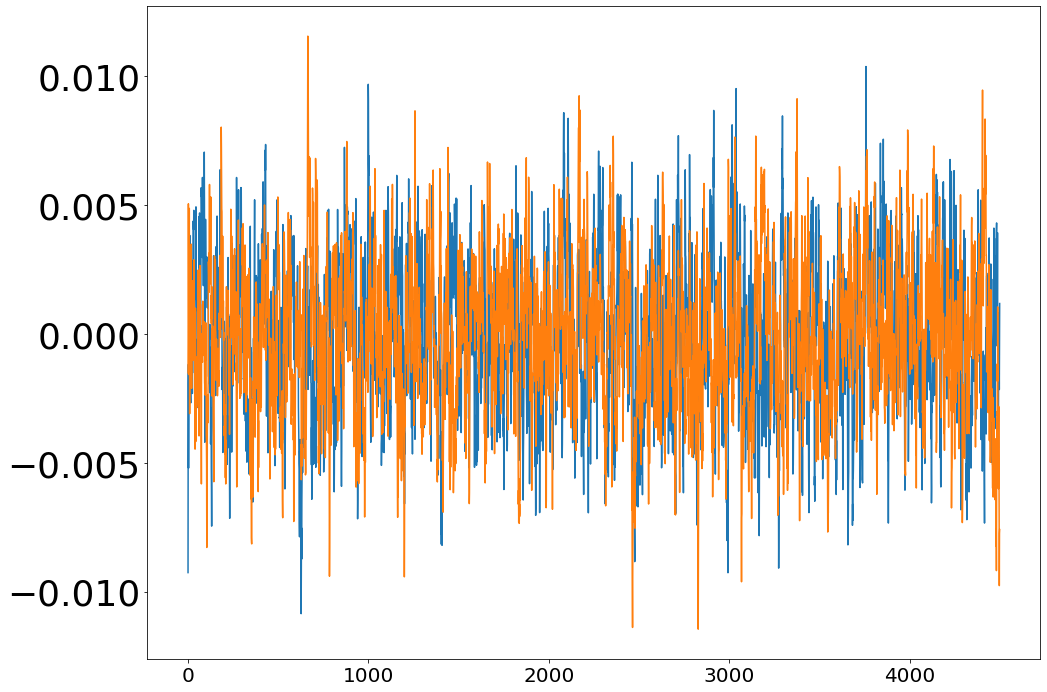

(F1     -1.268911e-04
 F2      1.048972e-04
 F3      2.812805e+02
 G1     -1.623630e-04
 G2     -1.597481e-04
 G3      8.616865e+00
 A      -3.772852e-05
 A/Um   -3.019644e-09
 B      -4.339347e-04
 dtype: float64,
 F1      1.383536e-04
 F2      1.383549e-04
 F3      1.827042e+02
 G1      1.333186e-04
 G2      1.423419e-04
 G3      1.173873e+02
 A       1.828014e-04
 A/Um    1.463072e-08
 B       2.738471e-04
 dtype: float64)

In [88]:
quickAnalyzeDataFrame(df2)

In [90]:
np.mean(v2[1][2::4])

199.91581326074314

In [189]:
folders = [r"/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V_3/",]
df3 = compare_millicharge_full_analysis_perFile(folders,fileNo=4998)
df3_side = get_sideband_analysis_perFile(folders,fileNo=4998)



  0%|          | 0/4998 [00:00<?, ?it/s]

voltages, bias:  200.0477466616795 0.09791119614142484 0.36155923850777216



  3%|▎         | 128/4998 [00:00<00:04, 996.82it/s]

voltages, bias:  200.0477466616795 0.09791119614142484 0.36155923850777216



100%|██████████| 4998/4998 [00:06<00:00, 742.10it/s]

In [190]:
meanDF0 = np.mean(df0)
stdDF0 = np.std(df0)/np.sqrt(len(df0))
meanDF1 = np.mean(df1)
stdDF1 = np.std(df1)/np.sqrt(len(df1))
meanDF2 = np.mean(df2)
stdDF2 = np.std(df2)/np.sqrt(len(df2))
meanDF3 = np.mean(df3)
stdDF3 = np.std(df3)/np.sqrt(len(df3))

In [191]:
df2

,F1_1,F2_1,G1_1,G2_1,A_1,B_1
0,-0.004627,0.004058,-0.000754,0.003179,-0.001178,0.001543
1,0.002031,0.000606,0.000948,-0.001028,0.002547,0.000206
2,-0.000024,-0.003288,0.006016,0.004053,-0.002819,0.008944
3,-0.006695,0.001452,-0.002582,0.001954,-0.005461,-0.001171
4,0.001857,0.001149,-0.002806,0.005669,0.002834,0.001290
...,...,...,...,...,...,...
4495,0.005382,-0.003225,-0.005682,-0.001457,0.002641,-0.006735
4496,-0.005432,-0.003208,-0.008860,-0.005190,-0.008158,-0.012610
4497,-0.002989,-0.006841,-0.011547,0.003140,-0.008804,-0.009279
4498,0.004508,-0.000770,0.000699,-0.002300,0.003854,-0.000962


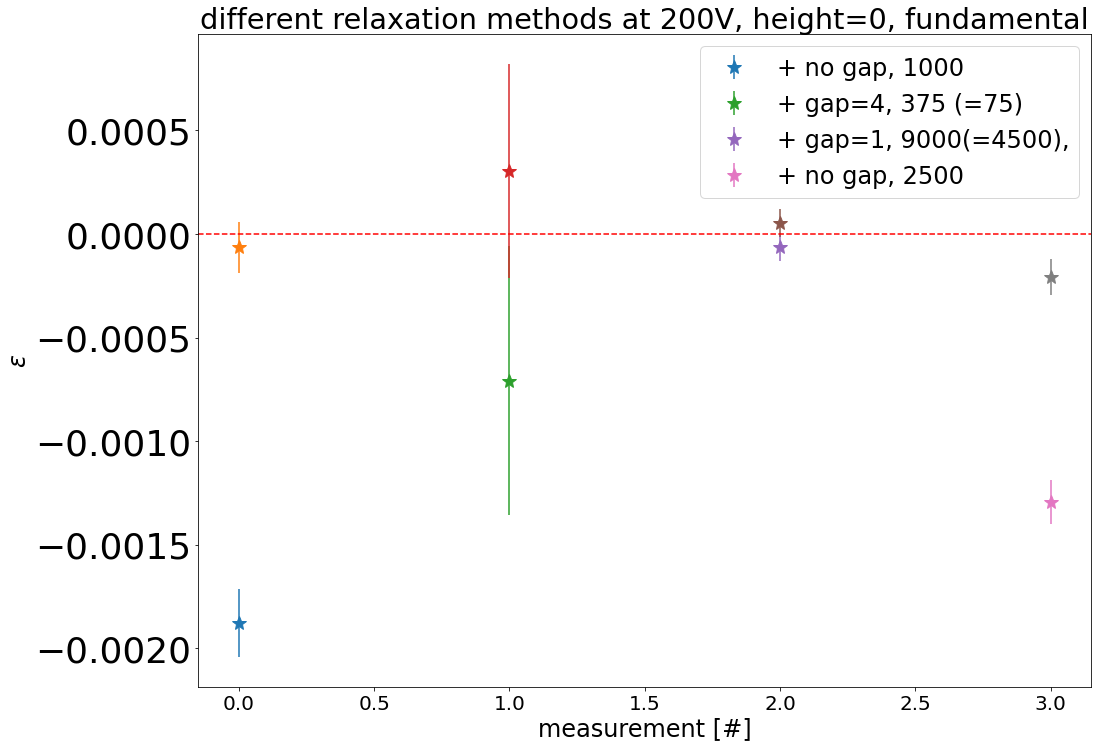

In [192]:
x=[0]
plt.errorbar(x,meanDF0[::6],yerr=stdDF0[::6],linestyle="",marker="*",markersize=15,label="+ no gap, 1000")
plt.errorbar(x,meanDF0[1::6],yerr=stdDF0[1::6],linestyle="",marker="*",markersize=15,)
x=[1]
plt.errorbar(x,meanDF1[::6],yerr=stdDF1[::6],linestyle="",marker="*",markersize=15,label="+ gap=4, 375 (=75)")
plt.errorbar(x,meanDF1[1::6],yerr=stdDF1[1::6],linestyle="",marker="*",markersize=15,)
x=[2]
plt.errorbar(x,meanDF2[::6],yerr=stdDF2[::6],linestyle="",marker="*",markersize=15,label="+ gap=1, 9000(=4500),")
plt.errorbar(x,meanDF2[1::6],yerr=stdDF2[1::6],linestyle="",marker="*",markersize=15)
x=[3]
plt.errorbar(x,meanDF3[::6],yerr=stdDF3[::6],linestyle="",marker="*",markersize=15,label="+ no gap, 2500")
plt.errorbar(x,meanDF3[1::6],yerr=stdDF3[1::6],linestyle="",marker="*",markersize=15)



plt.title("different relaxation methods at 200V, height=0, fundamental")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("measurement [#]")

plt.legend()

plt.show()

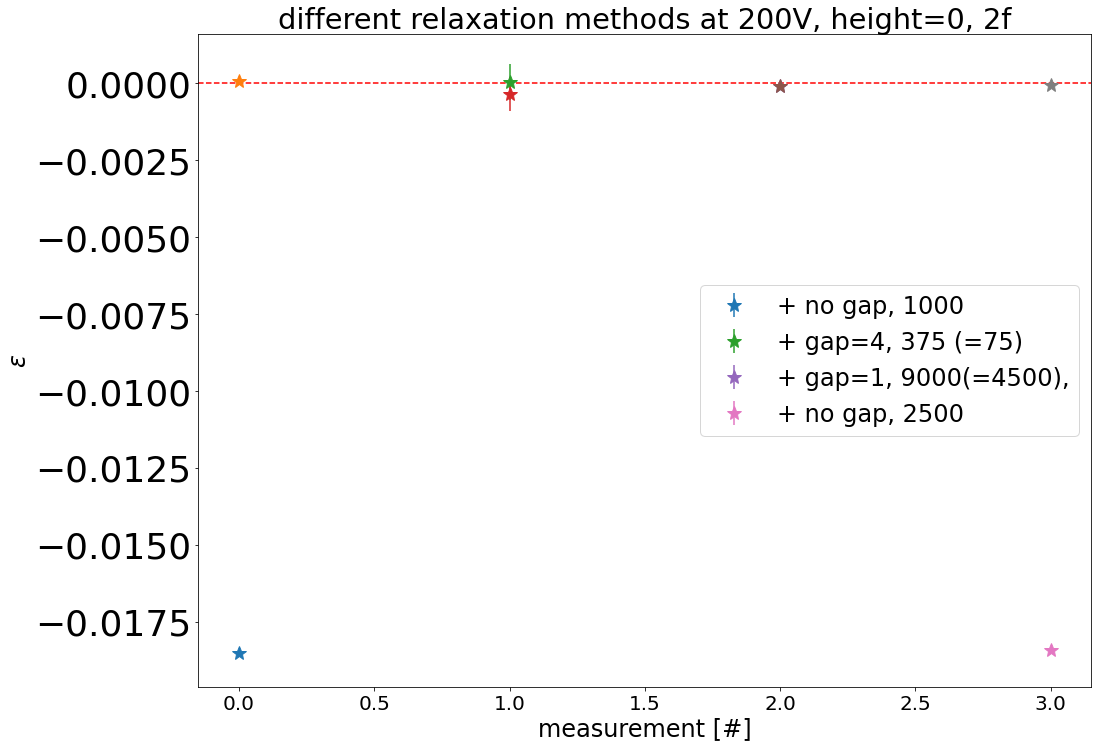

In [193]:
x=[0]
plt.errorbar(x,meanDF0[2::6],yerr=stdDF0[2::6],linestyle="",marker="*",markersize=15,label="+ no gap, 1000")
plt.errorbar(x,meanDF0[3::6],yerr=stdDF0[3::6],linestyle="",marker="*",markersize=15,)
x=[1]
plt.errorbar(x,meanDF1[2::6],yerr=stdDF1[2::6],linestyle="",marker="*",markersize=15,label="+ gap=4, 375 (=75)")
plt.errorbar(x,meanDF1[3::6],yerr=stdDF1[3::6],linestyle="",marker="*",markersize=15,)
x=[2]
plt.errorbar(x,meanDF2[2::6],yerr=stdDF2[2::6],linestyle="",marker="*",markersize=15,label="+ gap=1, 9000(=4500),")
plt.errorbar(x,meanDF2[3::6],yerr=stdDF2[3::6],linestyle="",marker="*",markersize=15)
x=[3]
plt.errorbar(x,meanDF3[2::6],yerr=stdDF3[2::6],linestyle="",marker="*",markersize=15,label="+ no gap, 2500")
plt.errorbar(x,meanDF3[3::6],yerr=stdDF3[3::6],linestyle="",marker="*",markersize=15)



plt.title("different relaxation methods at 200V, height=0, 2f")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("measurement [#]")

plt.legend()

plt.show()

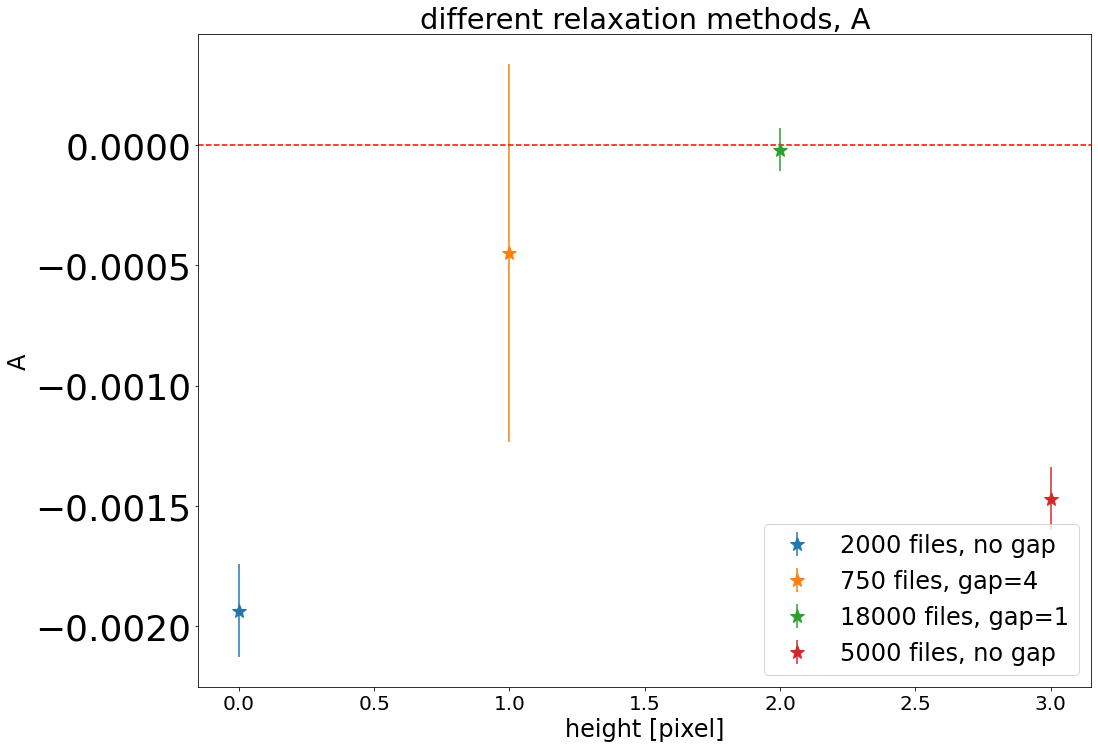

In [194]:
yerr0=  [np.sqrt(stdDF0[i]**2+0.85**2*stdDF0[i+1]**2) for i in np.arange(0,len(stdDF0),6)]
yerr1=  [np.sqrt(stdDF1[i]**2+0.85**2*stdDF1[i+1]**2) for i in np.arange(0,len(stdDF1),6)]
yerr2=  [np.sqrt(stdDF2[i]**2+0.85**2*stdDF2[i+1]**2) for i in np.arange(0,len(stdDF2),6)]
yerr3=  [np.sqrt(stdDF3[i]**2+0.85**2*stdDF3[i+1]**2) for i in np.arange(0,len(stdDF3),6)]
x=[0]
plt.errorbar(x,meanDF0[4::6],yerr=yerr0,linestyle="",marker="*",markersize=15,label="2000 files, no gap")
x=[1]
plt.errorbar(x,meanDF1[4::6],yerr=yerr1,linestyle="",marker="*",markersize=15,label="750 files, gap=4")
x=[2]
plt.errorbar(x,meanDF2[4::6],yerr=yerr2,linestyle="",marker="*",markersize=15,label="18000 files, gap=1")
x=[3]
plt.errorbar(x,meanDF3[4::6],yerr=yerr3,linestyle="",marker="*",markersize=15,label="5000 files, no gap")


plt.title("different relaxation methods, A")
plt.ylabel(r"A")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")
plt.legend()
plt.show()

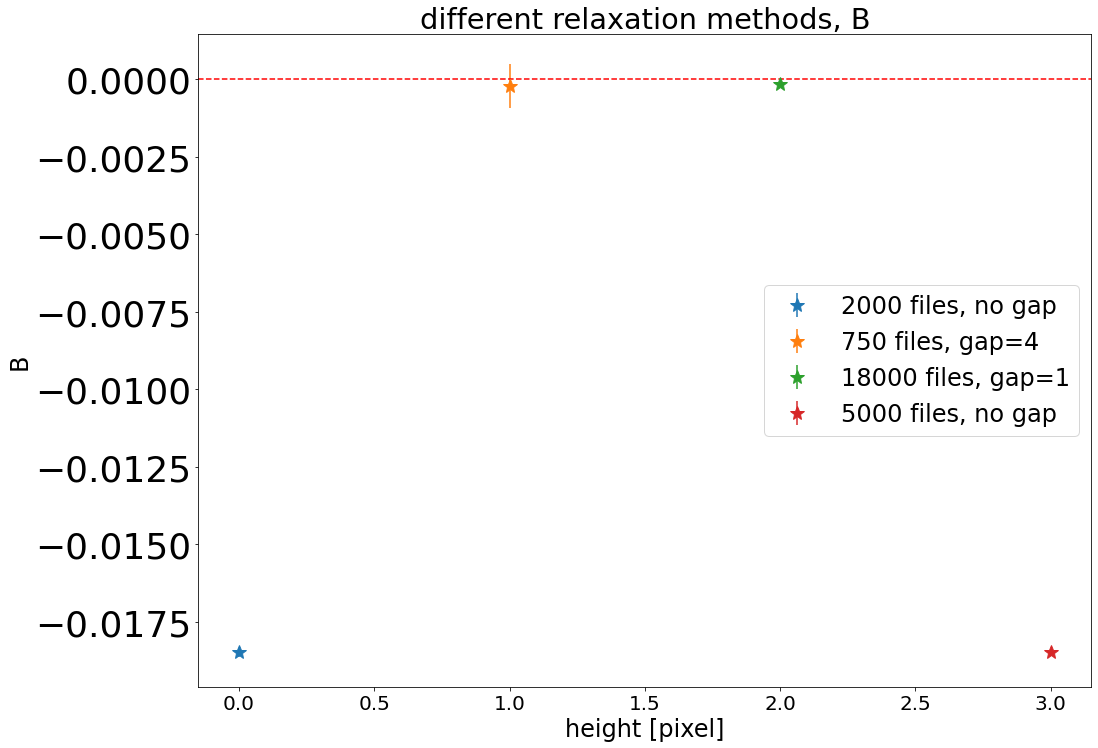

In [195]:
yerr0=  [np.sqrt(stdDF0[2]**2+0.85**4*stdDF0[3]**2)]
yerr1=  [np.sqrt(stdDF1[2]**2+0.85**4*stdDF1[3]**2)]
yerr2=  [np.sqrt(stdDF2[2]**2+0.85**4*stdDF2[3]**2)]
yerr3=  [np.sqrt(stdDF3[2]**2+0.85**4*stdDF3[3]**2)]
x=[0]
plt.errorbar(x,meanDF0[5::6],yerr=yerr0,linestyle="",marker="*",markersize=15,label="2000 files, no gap")
x=[1]
plt.errorbar(x,meanDF1[5::6],yerr=yerr1,linestyle="",marker="*",markersize=15,label="750 files, gap=4")
x=[2]
plt.errorbar(x,meanDF2[5::6],yerr=yerr2,linestyle="",marker="*",markersize=15,label="18000 files, gap=1")
x=[3]
plt.errorbar(x,meanDF3[5::6],yerr=yerr3,linestyle="",marker="*",markersize=15,label="5000 files, no gap")


plt.title("different relaxation methods, B")
plt.ylabel(r"B")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")
plt.legend()
plt.show()

In [ ]:
def single_electrode_milli_charge(folders,printValues=True,fileNo=2000):
    df = pd.DataFrame()
    i=0
    for folder in folders:   
        i+=1
        appliedVoltage=get_voltage(folder)
        
        F = np.array(Parallel(n_jobs=32)(delayed(get_response_at_first)(j,folder) for j in tqdm(range(fileNo))))
        G = np.array(Parallel(n_jobs=32)(delayed(get_response_at_second)(j,folder) for j in tqdm(range(fileNo))))

        data0 = F/scaleY*dischargeVoltage/appliedVoltage
        F1=data0

        data1 = G/scaleY*dischargeVoltage/appliedVoltage
        G1=data1
        
        df["F1_%d" %i] = F1
        df["G1_%d" %i] = G1        
    return df

In [457]:
folders = [r"/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V_single/",]
df3 =  single_electrode_milli_charge(folders,printValues=True,fileNo=1500)




  0%|          | 0/1500 [00:00<?, ?it/s]

voltages, bias:  199.91484611951324 0.0060731799878805375 0.2001310744677155





  2%|▏         | 32/1500 [00:01<00:59, 24.72it/s]


  4%|▍         | 64/1500 [00:02<00:55, 25.69it/s]


  6%|▋         | 96/1500 [00:02<00:42, 33.31it/s]


  9%|▊         | 128/1500 [00:03<00:33, 41.51it/s]


 11%|█         | 160/1500 [00:03<00:28, 47.31it/s]


 13%|█▎        | 192/1500 [00:03<00:21, 59.49it/s]


 15%|█▍        | 224/1500 [00:04<00:22, 57.75it/s]


 17%|█▋        | 256/1500 [00:04<00:18, 68.87it/s]


 19%|█▉        | 288/1500 [00:05<00:18, 66.85it/s]


 21%|██▏       | 320/1500 [00:05<00:14, 80.26it/s]


 23%|██▎       | 352/1500 [00:05<00:12, 91.08it/s]


 26%|██▌       | 384/1500 [00:06<00:13, 81.81it/s]


 28%|██▊       | 416/1500 [00:06<00:11, 93.95it/s]


 30%|██▉       | 448/1500 [00:06<00:11, 93.47it/s]


 32%|███▏      | 480/1500 [00:07<00:11, 85.11it/s]


 34%|███▍      | 512/1500 [00:07<00:10, 95.16it/s]


 36%|███▋      | 544/1500 [00:07<00:11, 82.66it/s]


 38%|███▊      | 576/1500 [00:08<00:12, 72.67it/s]


 41%|████      | 608/1500 [00:08<00:10, 85.26i